# DIABETES DATA ANALYSIS

* import library for data uploading

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

* upload diabetes data

In [2]:
data = pd.read_csv("C:/Users/hp/Downloads/archive/diabetes_prediction_dataset.csv")

* take 7 lines data overview for understanding

In [3]:
data.head(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1


* check mean, standard-deviation and some other properties of data

In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


* check data info -
*     1 - How many columns are present in dataset
*     2 - check if any column consist null value,
*     3 - check data types of the columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


* import visualization library for some visualization 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

* visualize Age in dataset

Text(0, 0.5, 'Frequency')

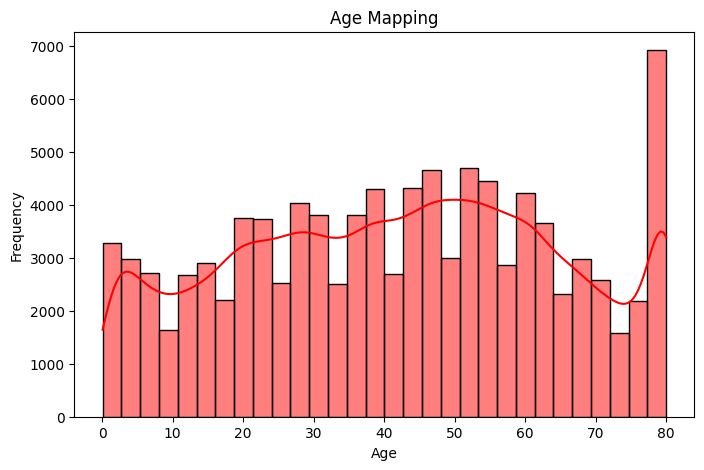

In [7]:
plt.figure(figsize = (8,5))
sns.histplot(data['age'], kde = True, bins = 30, color = 'red')
plt.title('Age Mapping')
plt.xlabel('Age')
plt.ylabel('Frequency')

* Visualize Gender in dataset

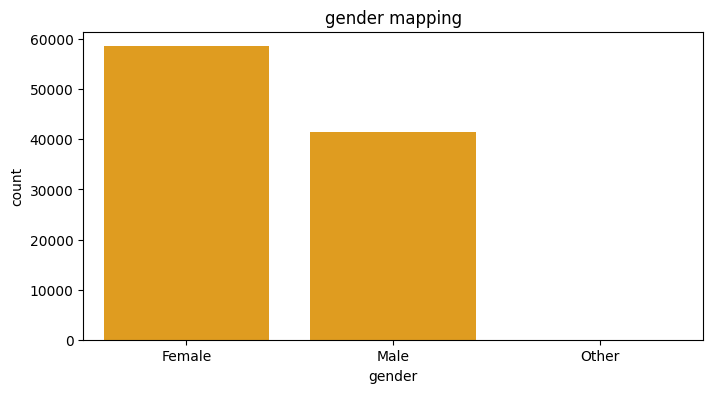

In [8]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'gender', data = data, color = 'orange')
plt.title('gender mapping')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

* Graph for checking diabetic person & non-diabetic person

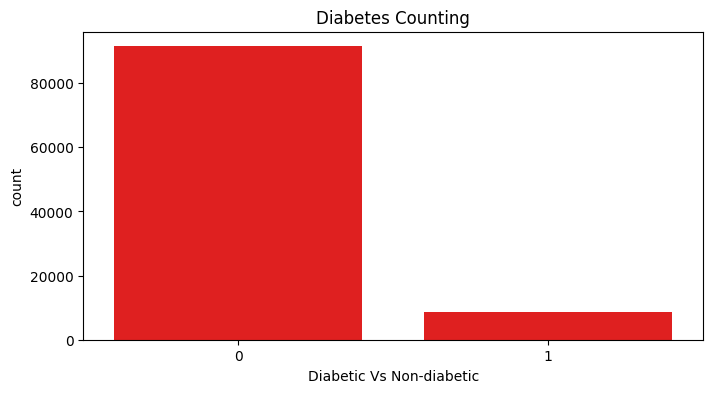

In [9]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'diabetes', data = data, color = 'red')
plt.title('Diabetes Counting')
plt.xlabel('Diabetic Vs Non-diabetic')
plt.ylabel('count')
plt.show()

* 0 means non diabetic person, 
* 1 means diabetic person

* visualize for Diabetes measurement by Age

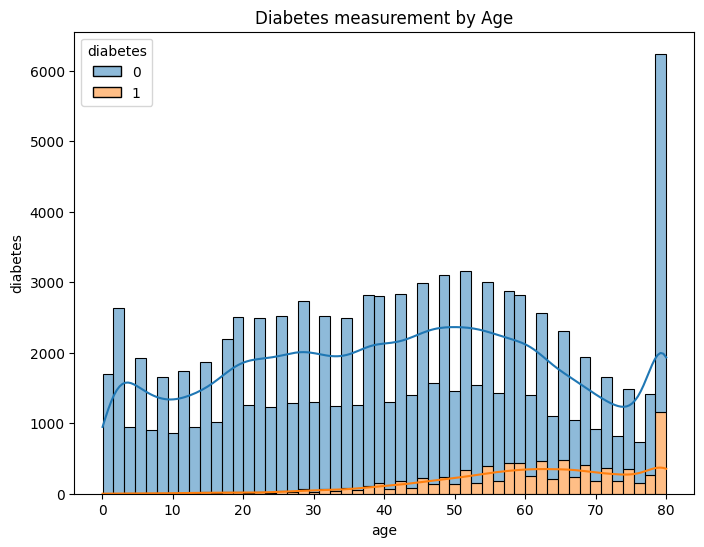

In [10]:
plt.figure(figsize = (8, 6))
sns.histplot(data = data, x = 'age', hue = 'diabetes', multiple = 'stack', kde = True)
plt.title('Diabetes measurement by Age')
plt.xlabel('age')
plt.ylabel('diabetes')
plt.show()

* visualize for Diabetes measurement by gender

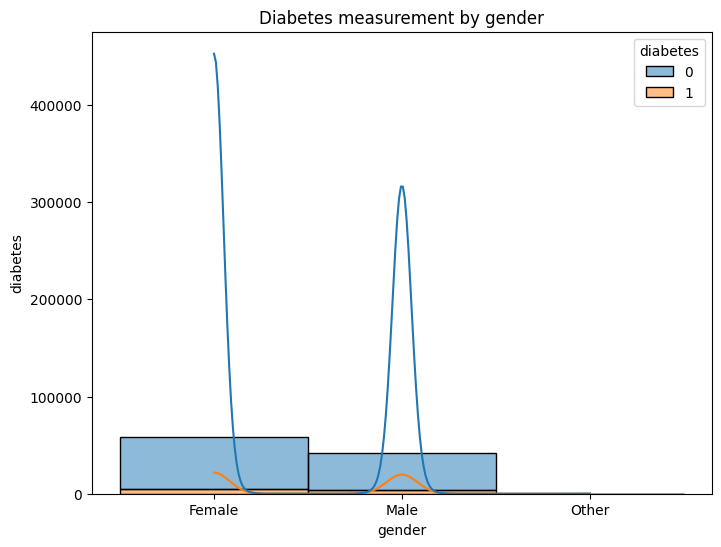

In [11]:
plt.figure(figsize = (8, 6))
sns.histplot(data = data, x = 'gender', hue = 'diabetes', multiple = 'stack', kde = True)
plt.title('Diabetes measurement by gender')
plt.xlabel('gender')
plt.ylabel('diabetes')
plt.show()

* visualize for Diabetes measurement by hypertension

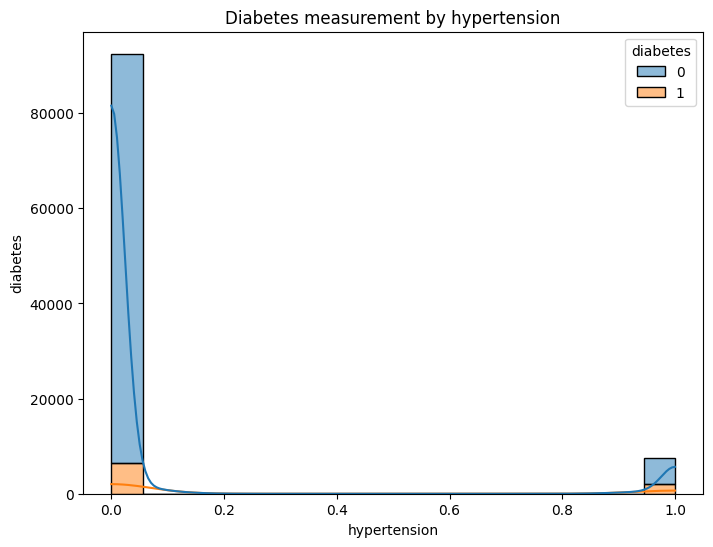

In [12]:
plt.figure(figsize = (8, 6))
sns.histplot(data = data, x = 'hypertension', hue = 'diabetes', multiple = 'stack', kde = True)
plt.title('Diabetes measurement by hypertension')
plt.xlabel('hypertension')
plt.ylabel('diabetes')
plt.show()

* check correlation via Heatmap

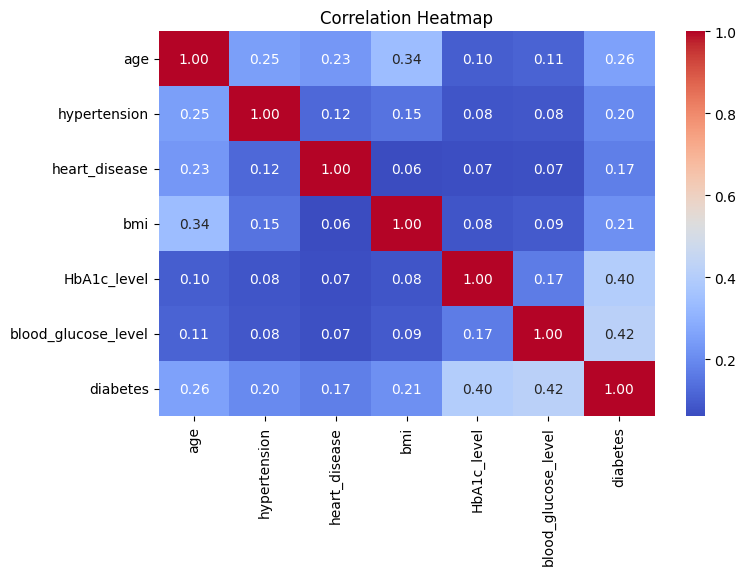

In [13]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

* Construct feature columns for further modeling
* take diabetes column as a feature column
* seperate dependent & independent column

In [14]:
x = data.drop(['diabetes'], axis = 1)
x = pd.get_dummies(x, drop_first = True)
y = data['diabetes']

* import library for train test data split

In [15]:
from sklearn.model_selection import train_test_split

* For further create model Split data into 2 parts 1 for traning & another for testing
* for training i am taking 80% data , & for testing i am taking 20% data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Model-1  =  Naive Bayes Model

* import library for naive bayes model

In [17]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(x_train, y_train)

GaussianNB()

In [18]:
y_pred1 = model1.predict(x_test)

In [19]:
y_pred1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

* Check accuracy, confusion- matrix, classification-report for Naive bayes model

In [20]:
accuracy = accuracy_score(y_test, y_pred1)
accuracy

0.869

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred1)
conf_matrix

array([[16024,  2268],
       [  352,  1356]], dtype=int64)

In [22]:
class_report = classification_report(y_test, y_pred1)
class_report

'              precision    recall  f1-score   support\n\n           0       0.98      0.88      0.92     18292\n           1       0.37      0.79      0.51      1708\n\n    accuracy                           0.87     20000\n   macro avg       0.68      0.83      0.72     20000\nweighted avg       0.93      0.87      0.89     20000\n'

# Model-2  =  Decision Tree Model

* import library for Decision tree model

In [23]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 5, min_samples_leaf = 9)
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, random_state=42)

In [24]:
y_pred2 = model2.predict(x_test)

In [25]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
target = list(data['diabetes'].unique())
feature_name = list(x.columns)

In [27]:
from sklearn.tree import  export_text
r = export_text(model2, feature_names = feature_name)

In [28]:
print(r)

|--- HbA1c_level <= 6.70
|   |--- blood_glucose_level <= 210.00
|   |   |--- age <= 54.50
|   |   |   |--- hypertension <= 0.50
|   |   |   |   |--- bmi <= 39.20
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  39.20
|   |   |   |   |   |--- class: 0
|   |   |   |--- hypertension >  0.50
|   |   |   |   |--- HbA1c_level <= 5.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- HbA1c_level >  5.35
|   |   |   |   |   |--- class: 0
|   |   |--- age >  54.50
|   |   |   |--- HbA1c_level <= 5.35
|   |   |   |   |--- class: 0
|   |   |   |--- HbA1c_level >  5.35
|   |   |   |   |--- blood_glucose_level <= 113.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- blood_glucose_level >  113.00
|   |   |   |   |   |--- class: 0
|   |--- blood_glucose_level >  210.00
|   |   |--- class: 1
|--- HbA1c_level >  6.70
|   |--- class: 1



* check accuracy-score, confusion-matrix , classification-report for Decision tree model

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.97215

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix

array([[18292,     0],
       [  557,  1151]], dtype=int64)

In [31]:
class_report = classification_report(y_test, y_pred2)
class_report

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99     18292\n           1       1.00      0.67      0.81      1708\n\n    accuracy                           0.97     20000\n   macro avg       0.99      0.84      0.90     20000\nweighted avg       0.97      0.97      0.97     20000\n'

# Model-3  =  Random Forest Model

* import library for Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model3 = RandomForestClassifier(random_state = 42)
model3.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred3 = model3.predict(x_test)

In [35]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

* check accuracy_score, confusion_matrix, classification_report for Random Forest Model

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
accuracy = accuracy_score(y_test, y_pred3)
accuracy

0.9699

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix

array([[18225,    67],
       [  535,  1173]], dtype=int64)

In [39]:
class_report = classification_report(y_test, y_pred3)
class_report

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98     18292\n           1       0.95      0.69      0.80      1708\n\n    accuracy                           0.97     20000\n   macro avg       0.96      0.84      0.89     20000\nweighted avg       0.97      0.97      0.97     20000\n'

# Model-4  =  KNeighbors Model

* import library for KNeighbor Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors = 1)

In [41]:
model4.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
y_pred4 = model4.predict(x_test)

In [43]:
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

* check accuracy-score, confusion-matrix, classification-report for KNeighbor Model

In [44]:
accuracy = accuracy_score(y_test, y_pred4)
accuracy

0.9418

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred4)
conf_matrix

array([[17809,   483],
       [  681,  1027]], dtype=int64)

In [46]:
class_report = classification_report(y_test, y_pred4)
class_report

'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97     18292\n           1       0.68      0.60      0.64      1708\n\n    accuracy                           0.94     20000\n   macro avg       0.82      0.79      0.80     20000\nweighted avg       0.94      0.94      0.94     20000\n'

* standardize the data for furter models

* import library for standardize the data

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model-5  =  Logistic regression Model

* import library for Logistic Model

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model5 = LogisticRegression()
model5.fit(x_train_scaled, y_train)

LogisticRegression()

In [51]:
y_pred5 = model5.predict(x_test_scaled)

In [52]:
y_pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

* check accuracy-score, confusion-matrix, classification-report for Logistic Model

In [53]:
accuracy = accuracy_score(y_test, y_pred5)
accuracy

0.95905

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred5)
conf_matrix

array([[18127,   165],
       [  654,  1054]], dtype=int64)

In [55]:
class_report = classification_report(y_test, y_pred5)
class_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98     18292\n           1       0.86      0.62      0.72      1708\n\n    accuracy                           0.96     20000\n   macro avg       0.91      0.80      0.85     20000\nweighted avg       0.96      0.96      0.96     20000\n'

#  Model=6  =  SVM MODEL

* import library for Support Vector Machine Model

In [56]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [57]:
model6 = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)

In [58]:
model6.fit(x_train_scaled, y_train)

SVC(C=1, gamma=0.1)

In [59]:
y_pred6 = model6.predict(x_test_scaled)

In [60]:
y_pred6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
accuracy = accuracy_score(y_test, y_pred6)
accuracy

0.96155

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred6)
conf_matrix

array([[18269,    23],
       [  746,   962]], dtype=int64)

In [63]:
class_report = classification_report(y_test, y_pred6)
class_report

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98     18292\n           1       0.98      0.56      0.71      1708\n\n    accuracy                           0.96     20000\n   macro avg       0.97      0.78      0.85     20000\nweighted avg       0.96      0.96      0.96     20000\n'

# Model- 7  =  Neural Layers model

* import library for Neural Layer Model

In [64]:
import tensorflow as tf

In [65]:
model7 = tf.keras.Sequential()

In [66]:
layers = tf.keras.layers

In [70]:
model7.add(layers.Flatten())
model7.add(layers.Dense(16, input_dim = x_train.shape[1], activation = 'relu'))
model7.add(layers.Dense(8, activation = 'relu'))
model7.add(layers.Dense(1, activation = 'sigmoid'))

model7.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model7.fit(x_train_scaled, y_train, epochs = 50, batch_size = 10, validation_data = (x_test_scaled, y_test))

Epoch 1/50


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8000/8000 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9669 - loss: 0.1600 - val_accuracy: 0.9706 - val_loss: 0.0874
Epoch 2/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9709 - loss: 0.0881 - val_accuracy: 0.9715 - val_loss: 0.0839
Epoch 3/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9707 - loss: 0.0850 - val_accuracy: 0.9714 - val_loss: 0.0844
Epoch 4/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9707 - loss: 0.0860 - val_accuracy: 0.9714 - val_loss: 0.0836
Epoch 5/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9708 - loss: 0.0858 - val_accuracy: 0.9706 - val_loss: 0.0858
Epoch 6/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9696 - loss: 0.0874 - val_accuracy: 0.9719 - val_loss: 0.0826
Epoch 7/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9710 - loss: 0.0845 - val_accuracy: 0.9708 - val_loss: 0.0875
Epoch 8/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9710 - loss: 0.0845 - val

In [71]:
y_pred7 = model7.predict(x_test_scaled)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [72]:
y_pred7

array([[0.00384775],
       [0.00035613],
       [0.00027061],
       ...,
       [0.00026821],
       [0.00885878],
       [0.02268053]], dtype=float32)

* check accuracy-score

In [74]:
accuracy7 = model7.evaluate(x_test_scaled, y_test)
accuracy7

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9718 - loss: 0.0827


[0.08264566212892532, 0.971750020980835]

In [79]:
# Save the model

In [83]:
import keras

In [85]:
keras.saving.save_model(model7, 'diabetes_model.keras')

In [86]:
import pickle

In [87]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [88]:
# end